<a href="https://colab.research.google.com/github/rafaelsguerra/data_science_portfolio/blob/main/Utilizando_redes_neurais_para_prever_g%C3%AAneros_musicais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Utilizando redes neurais para prever gêneros musicais

Neste artigo iremos explorar um conjunto de dados obtido pela [API do Spotify](https://developer.spotify.com/documentation/web-api/reference/) contendo informações sobre várias músicas e, a partir delas, prever a que gênero musical ela pertence. Para fins didáticos, iremos apenas utilizar os gêneros rock, samba e sertanejo.

## Explorando os dados

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('https://drive.google.com/uc?export=download&id=1zBIkLjUft3HgkXGOFgWAl68LiWTzoep9')

Esta é uma breve explicação das colunas presentes:
- SName: nome da faixa;
- Artist: nome do artista que compôs a faixa;
- Genre: o gênero que a faixa pertence. É a variável alvo;
- uri: link para ouvir a faixa na plataforma Spotify;
- danceabilty: descreve o quão dançante é uma faixa baseado em uma combinação de elementos, incluindo ritmo, tempo, força da batida, entre outros;
- energy: representa uma medida perceptiva de intensidade e atividade. Faixas com alta energia parecem rápidas, altas ou muito ruidosas;
- key: a clave na qual a faixa se encontra. 0 = C, 1 = C♯/D♭, 2 = D e assim por diante;
- loudness: medida geral para o volume da faixa em decibeis.;
- mode: modo da faixa, ou seja, o tipo de  escala da qual o conteúdo melódico da faixa é derivado. 1 é maior e 0 é menor;
- speechiness: detecta a presenca de palavras faladas numa faixa. Valores muito próximos de 1 indicam que a faixa pode ser um talk show ou similar. Valores medianos indicam presença de palavras e música. Valores baixos apresentam música ou outras faixas sem palavras;
- acousticness medida aproximada que indica se uma faixa é acústica;
- instrumentalness: indica se uma faixa não apresenta vocais. Valores acima de 0.5 já pressupõem que a faixa é instrumental, mas a confiança é maior com valores próximos de 1;
- liveness: detecta a presença de audiência na faixa. Valores altos indicam que a faixa provavelmente foi gravada ao vivo;
- valence: medida que indica o nivel de positividade que a faixa transmite. Faixas com índices altos soam mais positivas (felizes, eufóricas, alegres) enquanto índices baixos soam negativas (tristes, depressivas, raivosas);
- tempo: tempo estimado da faixa em patidas por minuto;
- duration_ms: duração da faixa em milissegundos;
- time_signature: fórmula de compasso média estimada da faixa;

In [2]:
data.head(5)

,SName,Artist,Genre,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Esperança,Aliados,Rock,spotify:track:63hfFSvMiAmIhet3runSer,0.540000,0.935,1.0,-5.132000,0.0,0.0569,0.002869,0.000000,0.2910,0.457999,120.052000,185520,4
1,Te Encontro Por Aí,Aliados,Rock,spotify:track:7jMXh3GaRS6WBvSN9tGklB,0.462999,0.764,8.0,-4.123999,1.0,0.0791,0.078100,0.000000,0.1130,0.450000,169.619000,184747,4
2,Pra Ser Feliz,Aliados,Rock,spotify:track:1K7IAeOK4N7SiJwx1GrQkk,0.632000,0.582,10.0,-5.941000,0.0,0.0298,0.257000,0.000000,0.1190,0.711000,116.902999,157533,4
3,Águas Passadas,Aliados,Rock,spotify:track:5IUct7lJG41x8YA0ixTo1E,0.598000,0.545,0.0,-7.996000,0.0,0.0251,0.550000,0.000172,0.1110,0.414000,104.026000,173640,4
4,No Seu Coração,Aliados,Rock,spotify:track:59B1xAWXsS9dNLIrsZNPMg,0.617000,0.664,7.0,-6.489000,0.0,0.0279,0.058300,0.000000,0.0795,0.770999,80.068000,159120,4


### Distribuição das variáveis

Vamos ver como os dados estão distribuidos por cada classe presente no conjunto.

In [3]:
rock = data[data['Genre'] == 'Rock']
rock.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,4084.0,0.540643,0.145030,0.000000,0.437999,0.542999,0.64500,0.964
energy,4084.0,0.732861,0.204529,0.000020,0.596750,0.782000,0.90400,0.999
key,4084.0,5.570519,3.530792,0.000000,2.000000,6.000000,9.00000,11.000
loudness,4084.0,-7.380358,3.288986,-27.753000,-9.234250,-6.678500,-4.99875,-1.310
mode,4084.0,0.709109,0.454229,0.000000,0.000000,1.000000,1.00000,1.000
speechiness,4084.0,0.065177,0.058771,0.000000,0.033000,0.044200,0.07200,0.699
acousticness,4084.0,0.177978,0.241608,0.000002,0.007177,0.057150,0.25600,0.982
instrumentalness,4084.0,0.029164,0.118711,0.000000,0.000000,0.000019,0.00110,0.958
liveness,4084.0,0.274063,0.253908,0.015000,0.102000,0.161500,0.34400,0.998
valence,4084.0,0.571279,0.236939,0.000000,0.386000,0.575000,0.77325,0.992


In [4]:
samba = data[data['Genre'] == 'Samba']
samba.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,5235.0,0.599543,0.117883,0.125000,0.525000,0.606000,0.682999,9.309990e-01
energy,5235.0,0.645901,0.180294,0.026900,0.539000,0.670000,0.784000,9.910000e-01
key,5235.0,5.245463,3.604268,0.000000,2.000000,5.000000,9.000000,1.100000e+01
loudness,5235.0,-9.109505,3.132081,-33.951000,-10.822500,-8.582000,-6.840000,-1.129000e+00
mode,5235.0,0.645463,0.478418,0.000000,0.000000,1.000000,1.000000,1.000000e+00
speechiness,5235.0,0.087395,0.076705,0.024100,0.041200,0.058300,0.101499,9.200000e-01
acousticness,5235.0,0.506006,0.234431,0.000985,0.319000,0.528000,0.690500,9.950000e-01
instrumentalness,5235.0,0.011600,0.079006,0.000000,0.000000,0.000000,0.000012,9.520000e-01
liveness,5235.0,0.356500,0.301441,0.020500,0.111999,0.226999,0.603000,9.950000e-01
valence,5235.0,0.708910,0.209599,0.035300,0.578000,0.754000,0.882000,9.840000e-01


In [5]:
sertanejo = data[data['Genre'] == 'Sertanejo']
sertanejo.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,7961.0,0.609651,0.128986,0.087600,0.5320,0.624000,0.7010,0.941
energy,7961.0,0.666014,0.195031,0.039300,0.5220,0.677999,0.8350,0.998
key,7961.0,5.313905,3.479707,0.000000,2.0000,5.000000,9.0000,11.000
loudness,7961.0,-6.368565,2.797029,-29.340000,-7.8150,-5.818000,-4.4230,0.120
mode,7961.0,0.890717,0.312013,0.000000,1.0000,1.000000,1.0000,1.000
speechiness,7961.0,0.055411,0.057107,0.022900,0.0307,0.037800,0.0554,0.948
acousticness,7961.0,0.457820,0.237158,0.000033,0.2650,0.462000,0.6490,0.996
instrumentalness,7961.0,0.006919,0.071758,0.000000,0.0000,0.000000,0.0000,0.960
liveness,7961.0,0.359221,0.284985,0.019700,0.1260,0.255000,0.5390,1.000
valence,7961.0,0.650172,0.209654,0.037800,0.4980,0.662000,0.8270,0.996


Vamos extrair alguns insights destas tabelas:
- Rock possui as músicas com maior energia, em média;
- Há mais faixas acústicas em samba e sertanejo do que em rock;
- Samba, em geral possui um tempo menor que sertanejo e rock;
- Há mais faixas de samba e sertanejo que foram gravadas ao vivo do que rock;
- Em geral, samba é o gênero que mais passa positividade;


In [6]:
data.describe(exclude=[np.number]).T

,count,unique,top,freq
SName,17280,16403,Perdoa,5
Artist,17280,211,Teodoro e Sampaio,303
Genre,17280,3,Sertanejo,7961
uri,17280,16654,spotify:track:2aFb5cOmIeq7EugDh46Peg,7


### Correlação entre variáveis

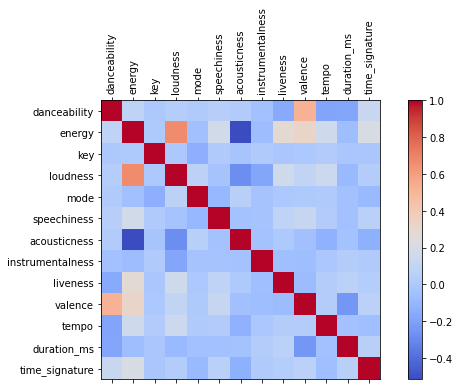

In [7]:
from matplotlib import pyplot as plt

numerical_variables = data.select_dtypes(np.number)
plt.figure(figsize=(10,5))
plt.matshow(numerical_variables.corr(), fignum=1, cmap='coolwarm')

plt.xticks(range(numerical_variables.shape[1]), numerical_variables.columns, rotation=90)
plt.yticks(range(numerical_variables.shape[1]), numerical_variables.columns)
plt.colorbar()
plt.show()

Observando a matriz de correlação acima, podemos identificar dois pares cuja correlação se diferencia da dos demais:
- acousticness e energy;
- loudness e energy.

O primeiro par possui uma correlação de aproximadamente -0.5, considerada média, enquanto que o segundo apresenta aproximadamente 0.7, que em algumas literaturas, ja pode ser considerada forte. 

In [12]:
corr_1 = data[['energy', 'loudness']].corr()['energy']['loudness']
corr_2 = data[['energy', 'acousticness']].corr()['energy']['acousticness']

print(f'Correlação entre \'energy\' e \'loudness\': {corr_1}')
print(f'Correlação entre \'energy\' e \'acousticness\': {corr_2}')

Correlação entre 'energy' e 'loudness': 0.6717679714017497
Correlação entre 'energy' e 'acousticness': -0.5157705605433102


Quando há ocorrências de correlação forte entre pares, a ação mais tomada é eliminar uma das variáveis, a fim de retirar redundâncias que podem afetar negativamente o desempenho dos modelos. Neste artigo, para fins didáticos, iremos manter os dois pares.

É necessário observar que as variáveis categóricas não estão presentes na matriz. Isso se dá ao fato de que não é possível obter correlações de variáveis desse tipo.

### Distribuição das classes

Observe o gráfico abaixo.

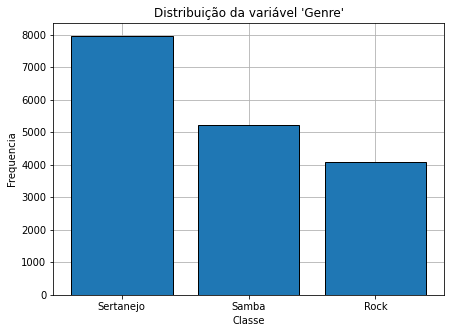

In [13]:
classes = data['Genre'].value_counts()

plt.figure(figsize=(7,5))
plt.bar(classes.index, classes, zorder=3, edgecolor='black')
plt.title('Distribuição da variável \'Genre\'')
plt.xlabel('Classe')
plt.ylabel('Frequencia')
plt.grid()
plt.show()

Claramente é possível perceber que há um desbalancemanto entre as classes do conjunto. Há quase o dobro de músicas com o gênero Sertanejo em relação ao Rock. Para solucionar este problema, utilizaremos **undersampling**, ou seja, diminuir o número de amostras de outras classes, a fim de tornar a distribuição das classes mais equilibrada. Neste artigo, as classes terão o mesmo número de amostras.

In [14]:
n_samples = int(len(data[data['Genre'] == 'Rock']))
balanced = pd.concat([data[data['Genre'] == 'Rock'], 
                      data[data['Genre'] == 'Samba'].sample(n_samples),
                      data[data['Genre'] == 'Sertanejo'].sample(n_samples)], 
                     ignore_index=True).reset_index(drop=True)

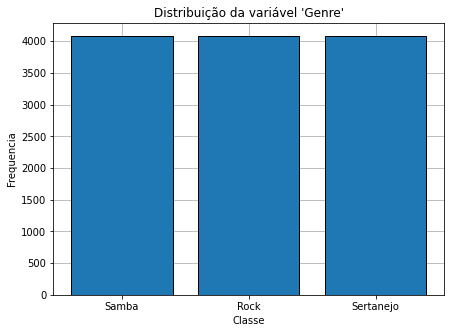

In [15]:
classes = balanced['Genre'].value_counts()

plt.figure(figsize=(7,5))
plt.bar(classes.index, classes, zorder=3, edgecolor='black')
plt.title('Distribuição da variável \'Genre\'')
plt.xlabel('Classe')
plt.ylabel('Frequencia')
plt.grid()
plt.show()

## Pré-processamento

Nesta fase, iremos preparar o conjunto de dados para que ele seja usado pelos modelos.

### Variáveis irrelevantes

Em alguns conjuntos de dados existem variáveis que facilmente podemos descrever como irrelevantes, pois não trazem informação util ao modelo. No conjunto deste artigo, podemos identificar a variável 'uri'. Ela simplesmente será removida do conjunto.

In [16]:
balanced.drop('uri', inplace = True, axis = 1)

### Encoding

Encoding é o processo de transformar variáveis categóricas em numéricas. Ainda temos 3 variáveis categóricas no conjunto: 'SName', 'Artist' e 'Genre'. Antes de realizar qualquer ação, devemos atentar para as seguintes situações.

A variável 'SName' apresenta uma grande cardinalidade, que é bastante próxima ao número de amostras do conjunto. Realizar encoding nesta variável iria trazer mais prejuízos do que benefícios, pois iriam ser criadas muitas variáveis extras tornando o modelo excessivamente complexo e com tempo de treino alto demais, portanto ela será removida do conjunto.

O caso da variável 'Artist' é similar. Há uma grande quantidade de valores únicos na variável. É possível aplicar a técnica de **one-hot encoding**, onde cada valor único desta variável se tornaria uma nova variável binária no conjunto, mas, como dito anteriormente, muitas variáveis novas seriam criadas, e isto afetaria negativamente o modelo. Existem técnicas mais avançadas de encoding, como a criação de **word embeddings**. O objetivo deste artigo é apresentar uma solução que equilibre rapidez e simplicidade, portanto, não será aplicado encoding nesta variável e ela será simplesmente removida.

In [17]:
balanced.drop(['SName', 'Artist'], inplace = True, axis = 1)

A última variável categórica restante é 'Genre', que é justamente o nosso alvo. A grande maioria dos modelos ja implementados da biblioteca scikit-learn aplica **label encoding** nas variáveis alvo, ou seja, cada ocorrência de um valor é trocado por um número inteiro. Logo, não há necessidade de transformar a variável, por enquanto.

No fim das contas, o conjunto não sofreu tantas mudanças.

In [18]:
balanced.head(5)

,Genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Rock,0.540000,0.935,1.0,-5.132000,0.0,0.0569,0.002869,0.000000,0.2910,0.457999,120.052000,185520,4
1,Rock,0.462999,0.764,8.0,-4.123999,1.0,0.0791,0.078100,0.000000,0.1130,0.450000,169.619000,184747,4
2,Rock,0.632000,0.582,10.0,-5.941000,0.0,0.0298,0.257000,0.000000,0.1190,0.711000,116.902999,157533,4
3,Rock,0.598000,0.545,0.0,-7.996000,0.0,0.0251,0.550000,0.000172,0.1110,0.414000,104.026000,173640,4
4,Rock,0.617000,0.664,7.0,-6.489000,0.0,0.0279,0.058300,0.000000,0.0795,0.770999,80.068000,159120,4


## Modelagem

Nesta fase, iremos utilizar o conjunto tratado e aplicá-los em modelos.

Antes de começarmos, a função abaixo irá nos ajudar a obter métricas para avaliação dos modelos.

In [19]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def get_metrics(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
  recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
  f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

  print(f'Acurácia: {accuracy}')
  print(f'Precisão: {precision}')
  print(f'Recall: {recall}')
  print(f'F1: {f1}')

E aqui, vamos dividir o conjunto em treino e teste.

In [20]:
from sklearn.model_selection import train_test_split

X = balanced.drop('Genre', axis=1)
y = balanced['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Validação cruzada

Validação cruzada é uma ótima maneira de testar a capacidade de generalização do modelo. Esta técnica consiste treinar modelos com várias partições diferentes do conjunto de dados. Existem várias maneiras de realizar este processo, sendo as mais populares, **leave-one-out**, **hold-out** e **k-fold** que será utilizada neste artigo.

A validação k-fold simplesmente divide o conjunto em k partições, utiliza uma delas para teste e as outras k-1 serão utilizadas para treino. Este processo se repete k vezes, de modo que cada partição seja utilizada para teste uma vez.

Por hora, vamos instanciar a classe ```StratifiedKFold``` da bilbioteca scikit-learn e deixar os preparativos feitos.

In [21]:
from sklearn.model_selection import StratifiedKFold
n_folds = 10
k_fold = StratifiedKFold(n_folds)

### Feature scaling

É muito comum em projetos de ciência de dados em geral, que o escalonamento de dados seja feito antes da divisão do conjunto em treino e teste. Isso pode acarretar em efeitos indesejados. Quando o escalonamento é feito antes da divisão, parte da informação da divisão de teste do conjunto de dados é passada para a divisão de treino, causando o chamado **vazamento de dados**.

Para evitar este problema, os dados são depois da dvisão do conjunto de dados. Aqui escolhemos a normalização como método, onde cada valor de uma variável é divido pelo valor máximo que ela assumiu, a fim de de que os dados passem a pertencer a um intervalo entre 0 e 1.

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
norm_X_train = scaler.transform(X_train)
norm_X_test = scaler.transform(X_test)

### Regressão Logística
A regressão logística utiliza uma função sigmoide para determinar a probabilidade de uma entrada do conjunto de dados pertencer a determinada classe. A implementação da regressão logística da bilbioteca **scikit-learn** utiliza regularização L2 por padrão. Portanto, vamos testar diferentes valores de C que irão dosar a força de regularização e, ao mesmo tempo, empregar validação cruzada. Note que os dados são normalizados a cada divisão da validação.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

logreg_C = [1e-4, 1e-3, 1e-2, 1e-1, 1]
best_c = logreg_C[0]
best_score, best_accuracy, best_precision, best_recall = 0, 0, 0, 0
avg_scores = []

for c in logreg_C:
    score = 0
    accuracy = 0
    recall = 0
    precision = 0
    for train_index, valid_index in k_fold.split(X_train, y_train):
        X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        scaler.fit(X_train)
        norm_X_train_fold = scaler.transform(X_train_fold)
        norm_X_valid_fold = scaler.transform(X_valid_fold)

        model = LogisticRegression(C=c, random_state=42, class_weight='balanced', max_iter=1000)
        model.fit(norm_X_train_fold, y_train_fold)
        pred = model.predict(norm_X_valid_fold)

        score += f1_score(y_valid_fold, pred, average='macro')
        accuracy += accuracy_score(y_valid_fold, pred)
        recall += recall_score(y_valid_fold, pred, average='macro')
        precision += precision_score(y_valid_fold, pred, average='macro', zero_division=0)

    score = score / n_folds # média
    avg_scores.append(score)  

    accuracy = accuracy / n_folds
    recall = recall / n_folds
    precision = precision / n_folds

    if (score > best_score):
        best_score = score
        best_accuracy = accuracy
        best_recall = recall
        best_precision = precision
        best_c = c

Vejamos agora as métricas obtidas na validação cruzada.

In [24]:
print(f'Melhor C: {best_c}')
print(f'Acurácia: {best_accuracy}')
print(f'Precisão: {best_precision}')
print(f'Recall: {best_recall}')
print(f'F1: {best_score}')

Melhor C: 1
Acurácia: 0.7148249391499719
Precisão: 0.7151931538290879
Recall: 0.7148560099575899
F1: 0.7146608495974688


E agora, vejamos como o modelo se sai com dados novos.

In [27]:
model = LogisticRegression(C=best_c, random_state=42, class_weight='balanced', max_iter=1000)
model.fit(norm_X_train, y_train)
y_pred = model.predict(norm_X_test)

get_metrics(y_test, y_pred)

Acurácia: 0.7123623011015912
Precisão: 0.7127480498356884
Recall: 0.7122761857620801
F1: 0.7122258098991022


Observe também como C influencia nos resultados, especificamente, no valor de F1.

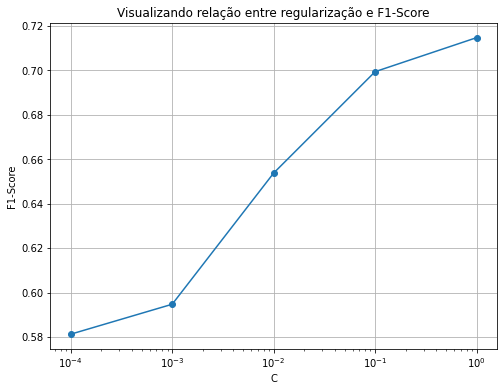

In [28]:
plt.figure(figsize=(8,6))
plt.plot(logreg_C, avg_scores, '-o')
plt.title('Visualizando relação entre regularização e F1-Score')
plt.xlabel('C')
plt.ylabel('F1-Score')
plt.xscale('log')
plt.grid()  
plt.show()

Pelos resultados mostrados, observamos que a regressão logística apresentou valores semelhantes nas métricas avaliadas. Dado que os valores das variáveis das 3 classes são relativamente próximos, como visto na seção de exploração dos dados, podemos dizer que os resultados são satisfatórios.

### KNN

K-Nearest Neighbors ou KNN é um algoritmo que pode ser usado tanto para regressão quanto classificação. Em um determinado plano, onde os dados estão presentes, é escolhido um ponto que representa uma entrada do conjunto de dados. A partir deste ponto, verifica-se as classes dos k vizinhos mais próximos. A classe prevista para este ponto será a que for maioria dentre os k escolhidos.

Para tornar o processo de tuning mais rápido, iremos aplicar **GridSearch** no modelo. GridSearch é um método de otimização hiperparâmetros que, dada uma lista de parâmetros, será realizada uma busca exaustiva na tentativa de achar a melhor combinação de hiperparâmetros de um modelo. A classe ```GridSearchCV``` da biblioteca scikit-learn permite que, além da busca dos hiperparâmetros, também seja feita validação cruzada. Existem outros métodos de otimização, como [busca randomizada](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) e [otimização bayesiana](https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html).

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
params = {
    'n_neighbors': list(range(5, 31, 5)),
    'p': [1, 2],
    'leaf_size': list(range(10, 51, 10))
}
gs = GridSearchCV(model, params, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], cv=n_folds, refit='accuracy')
gs.fit(norm_X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [5, 10, 15, 20, 25, 30], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False,
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'],
             verbose=0)

Feita a busca, é possível resgatar os melhores hiperparâmetros obtidos com a propriedade ```best_params_```.

In [31]:
gs.best_params_

{'leaf_size': 10, 'n_neighbors': 25, 'p': 1}

Finalmente, vamos verificar o desempenho do modelo com dados novos, utilizando os hiperparâmetros obtidos.

In [32]:
y_pred = gs.predict(norm_X_test)
get_metrics(y_test, y_pred)

Acurácia: 0.7172582619339045
Precisão: 0.7206383874609172
Recall: 0.7173031784896526
F1: 0.717687575329284


Os resultados obtidos no KNN são um pouco melhores que os da regressão logística. De forma similar todas as métricas assumem valores bem próximos. Em vez de continuar treinando modelos convencionais, vamos tentar uma abordagem diferente e adentrar na aprendizagem profunda utilizando redes neurais.

### Redes Neurais

Uma rede neural tenta emular como o cerebro humano funciona. É formada por várias estruturas interligadas que simulam neurônios e sinapses. 

No contexto de redes neurais, um neurônio possui uma ou mais entradas ponderadas, uma função de ativação que irá determinar o valor que o neuron irá emitir e uma ou mais saídas.

Uma rede neural é formada por pelo menos uma camada de entrada, uma camada oculta e uma camada de saída. Na entrada serão recebidos os valores das variáveis do conjunto de dados. Esses valores repassados para as camadas ocultas, onde cada neurônio dessa camada irá fazer uma soma ponderada dos valores e atribuí-la na função de ativação. O resultado da função é repassado para as próximas camadas até chegar na de saída, que representará o resultado da previsão.

Redes neurais admitem apenas valores numéricos no conjunto, portanto será aplicado encoding na variável alvo.

In [33]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

lb_y_train = lb.fit_transform(y_train)
lb_y_test = lb.fit_transform(y_test)

Primeiramente, vamos testar uma rede neural simples com apenas uma camada oculta contendo 6 neurônios.

In [36]:
from tensorflow.keras import Sequential, layers

model = Sequential()
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(norm_X_train, lb_y_train, epochs=10, batch_size=10)

Epoch 1/10
981/981 [==============================] - 1s 967us/step - loss: 1.1243 - accuracy: 0.3228
Epoch 2/10
981/981 [==============================] - 1s 974us/step - loss: 1.0029 - accuracy: 0.5503
Epoch 3/10
981/981 [==============================] - 1s 940us/step - loss: 0.8712 - accuracy: 0.6522
Epoch 4/10
981/981 [==============================] - 1s 970us/step - loss: 0.8285 - accuracy: 0.6734
Epoch 5/10
981/981 [==============================] - 1s 957us/step - loss: 0.8147 - accuracy: 0.6773
Epoch 6/10
981/981 [==============================] - 1s 963us/step - loss: 0.7839 - accuracy: 0.6892
Epoch 7/10
981/981 [==============================] - 1s 983us/step - loss: 0.7681 - accuracy: 0.6918
Epoch 8/10
981/981 [==============================] - 1s 963us/step - loss: 0.7721 - accuracy: 0.6913
Epoch 9/10
981/981 [==============================] - 1s 961us/step - loss: 0.7550 - accuracy: 0.6999
Epoch 10/10
981/981 [==============================] - 1s 994us/step - loss: 0.760

Pelos logs apresentados, parece que o modelo se ajustou bem ao conjunto, apresentando uma acurácia um pouco menor que o da regressão logística e do KNN. Vamos ver como ele se sai com dados novos.

In [37]:
model.evaluate(norm_X_test, lb_y_test)

77/77 [==============================] - 0s 836us/step - loss: 0.7637 - accuracy: 0.6969


[0.7636947631835938, 0.6968584060668945]

In [38]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(lb_y_test, np.argmax(model.predict(norm_X_test), axis=-1), zero_division=0, average='macro')

(0.7008966884860781, 0.696725915912156, 0.6963728505427415, None)

Do mesmo modo, o modelo tem uma peformance similar com dados novos em relação aos modelos anteriores.

Observe que esta rede neural é demasiadamente simples, com poucos neurônios e apenas uma camada oculta. Vamos criar uma rede neural mais robusta com hiperparâmetros tunados.

Há muitas maneiras de tunar hiperparâmetros de redes neurais. Neste artigo, iremos utilizar algumas ferramentas da biblioteca **kerastunner**. De modo semelhante ao GridSearch e às classes da biblioteca scikit-optimize, kerastunner oferece várias classes que ajudam a tunar redes neurais. Neste artigo iremos utilizar ```Hyperband()``` que funciona de modo semelhante a uma busca randomizada, mas que utiliza parada antecipada para acelerar o processo. Outras classes podem ser conferidas [aqui](https://keras-team.github.io/keras-tuner/documentation/tuners/#tuners).

O trecho ```&> /dev/null``` apenas suprime a saída do console.

In [40]:
!pip install keras-tuner &> /dev/null
import kerastuner

A classe Hyperband tem como um dos parâmetros a chamada de uma função que construa um hipermodelo. Nessa função, foi construído um modelo com três camadas ocultas. Neste artigo, iremos tunar o número de neurônios em cada camada e taxa de aprendizagem do otimizador do modelo. Por meio do método ```Int()``` da classe ```HyperParameters``` podemos selecionar um intervalo de inteiros. De forma similar, o método ```Choice()``` selecionará um valor dentre um conjunto predefinido.

In [41]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses

def model_builder(hp):
  model = Sequential()
  model.add(layers.Flatten())
  
  model.add(layers.Dense(units = hp.Int(name='units_1', min_value=16, max_value=256, step=16),
                         activation = 'relu'))
  model.add(layers.Dense(hp.Int('units_2', 16, 256, 16), activation = 'relu'))
  model.add(layers.Dense(hp.Int('units_3', 16, 256, 16), activation = 'relu'))
  model.add(layers.Dense(3, activation='softmax'))

  hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
 
  model.compile(optimizer = optimizers.Adam(learning_rate=hp_lr),
                loss = losses.SparseCategoricalCrossentropy(), 
                metrics = ['accuracy'])
  return model

Depois disso, instanciamos a classe Hyperband e iniciamos a busca dos hiperparâmetros.

In [42]:
tuner = kerastuner.Hyperband(model_builder,
                             objective = 'val_accuracy',
                             max_epochs = 30,
                             directory ='my_dir')

tuner.search(norm_X_train, lb_y_train, epochs=30, validation_split=0.2)

Trial 90 Complete [00h 00m 13s]
val_accuracy: 0.7603263854980469

Best val_accuracy So Far: 0.7644059062004089
Total elapsed time: 00h 05m 57s
INFO:tensorflow:Oracle triggered exit


Feita a busca, podemos visualizar os hiperparâmetros do modelo que obteve com maior acurácia com o método ```get_best_hyperparameters()```.

In [46]:
best_hps = tuner.get_best_hyperparameters()[0]

print(f"Neurônios na primeira camada: {best_hps.get('units_1')}")
print(f"Neurônios na segunda camada: {best_hps.get('units_2')}")
print(f"Neurônios na terceira camada: {best_hps.get('units_3')}")
print(f"Taxa de aprendizagem do otimizador: {best_hps.get('learning_rate')}")

Neurônios na primeira camada: 224
Neurônios na segunda camada: 160
Neurônios na terceira camada: 128
Taxa de aprendizagem do otimizador: 0.001


Também é possível acessar os modelos construídos durante a busca. Portanto, vamos pegar o modelo que obteve a melhor acurácia e ver como ele se sai com dados novos.

In [47]:
best_model = tuner.get_best_models(1)[0]
loss, accuracy = best_model.evaluate(norm_X_test, lb_y_test)

77/77 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.7423


In [48]:
precision_recall_fscore_support(lb_y_test, np.argmax(best_model.predict(norm_X_test), axis=-1), zero_division=0, average='macro')

(0.739879886232964, 0.7337590890345261, 0.7339026964171934, None)

Observando os valores das métricas, podemos ver que o desempenho da rede neural é bem semelhante ao dos modelos anteriores.

## Considerações finais

A tabela a seguir oferece um resumo geral do desempenho dos modelos testados.

Modelo | Acurácia | Precisão | Recall | F1
---|---|---|---|---
Regressão Logística|0.7123623011015912|0.7127480498356884|0.7122761857620801|0.7122258098991022
KNN|0.7172582619339045|0.7206383874609172|0.7173031784896526|0.717687575329284
Rede neural simples|0.6968584060668945|0.7008966884860781|0.696725915912156|0.6963728505427415
Rede neural tunada|0.7423|0.739879886232964|0.7337590890345261|0.7339026964171934

De modo geral, os três modelos apresentam desempenho relativamente satisfatório, com a rede neural apresentando métricas um pouco superiores em relação aos outros e, apesar de funcionarem de modo diferente, a regressão logística e o knn apresentaram métricas muito próximas.

Visto os resultados, podemos afirmar que ainda não é possível confiar cegamente nos modelos, mas eles podem se tornar ótimas ferramentas de apoio à decisão.

 